In [113]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import sklearn
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error

In [114]:
# importing dataset
walmart_dataset=pd.read_csv('D:\\SIMPLILEARN\\Data Science with Python\\Walmart_Store_sales.csv')

In [115]:
walmart_dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [116]:
walmart_dataset.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [117]:
walmart_dataset.shape

(6435, 8)

In [118]:
walmart_dataset.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [119]:
# finding the missing value in the data
walmart_dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [120]:
#Since no missing value so no Data Cleaning required

In [121]:
walmart_dataset.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [122]:
#Analysis Tasks

#Basic Statistics tasks

#1.Which store has maximum sales
maximum_sales=walmart_dataset.groupby('Store')['Weekly_Sales'].sum()
print(maximum_sales.head(10)) 

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
Name: Weekly_Sales, dtype: float64


In [123]:
print("Store Number {} has maximum Sales and Sum of Total Sales {}".format(maximum_sales.idxmax(),maximum_sales.max()))

Store Number 20 has maximum Sales and Sum of Total Sales 301397792.46000004


In [124]:
# 2 - Which store has maximum standard deviation i.e., the sales vary a lot.
std_list=[]
std_list=walmart_dataset.groupby(['Store'])['Weekly_Sales'].std()
print (std_list.head(10))
max_sales=max(std_list)

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
Name: Weekly_Sales, dtype: float64


In [125]:
print ("Store no. {} has maximum Standard deviation which is {}." .format(std_list.idxmax(),max_sales))

Store no. 14 has maximum Standard deviation which is 317569.9494755081.


In [126]:
# Also, find out the coefficient of mean to standard deviation.
mean_std= walmart_dataset.groupby('Store').agg({'Weekly_Sales':['mean','std']})
print(mean_std.head(8))
coef_mean_std = pd.DataFrame(walmart_dataset.groupby('Store')['Weekly_Sales'].std() / walmart_dataset.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

       Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745
6      1.564728e+06  212525.855862
7      5.706173e+05  112585.469220
8      9.087495e+05  106280.829881


,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


In [127]:
# 3 - Which store/s has good quarterly growth rate in Q3’2012

In [128]:
walmart_dataset['Date']=pd.to_datetime(walmart_dataset['Date'],format='%d-%m-%Y')
print(walmart_dataset)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

In [129]:
walmart_dataset_Q32012 = walmart_dataset[((walmart_dataset['Date']) >= pd.to_datetime('01-07-2012',format="%d-%m-%Y")) &
                                         ((walmart_dataset['Date']) <= pd.to_datetime('30-09-2012',format="%d-%m-%Y"))]
walmart_dataset_Q32012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908
...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684


In [130]:
walmart_dataset.info()
print (walmart_dataset_Q32012['Date'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
['2012-07-06T00:00:00.000000000' '2012-07-13T00:00:00.000000000'
 '2012-07-20T00:00:00.000000000' '2012-07-27T00:00:00.000000000'
 '2012-08-03T00:00:00.000000000' '2012-08-10T00:00:00.000000000'
 '2012-08-17T00:00:00.000000000' '2012-08-24T00:00:00.000000000'
 '2012-08-31T00:00:00.000000000' '2012-09-07T00:00:00.000000000

In [131]:
walmart_dataset_growth=walmart_dataset_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
walmart_dataset_growth

Store
1     20253947.78
2     24303354.86
3      5298005.47
4     27796792.46
5      4163790.99
6     20167312.24
7      8262787.39
8     11748952.70
9      7022149.56
10    23037258.76
11    17516081.44
12    12536324.37
13    26421259.30
14    21187560.65
15     7612081.03
16     7121541.64
17    12459453.05
18    13489765.27
19    18203554.85
20    26891526.98
21     9027599.32
22    12845139.71
23    18641489.15
24    17976377.72
25     9109081.84
26    13675691.91
27    22307711.41
28    16080704.97
29     6671234.14
30     5594701.86
31    17806714.45
32    15396528.95
33     3433620.36
34    12485995.94
35    11322421.12
36     3831691.64
37     6728068.24
38     5605482.38
39    20715116.23
40    12873195.37
41    18093844.01
42     7296759.34
43     8000572.16
44     4411251.16
45     9581268.38
Name: Weekly_Sales, dtype: float64

In [132]:
print ("Store which has maximum Q3 growth of {} in the year of 2012 is {}."
       .format(walmart_dataset_growth.max(),walmart_dataset_growth.idxmax()))

Store which has maximum Q3 growth of 27796792.46 in the year of 2012 is 4.


In [133]:
# 4 -Some holidays have a negative impact on sales. 
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [134]:
Christmas_sales=walmart_dataset.loc[(walmart_dataset["Date"]==pd.to_datetime("31-12-2010")) |
                                    (walmart_dataset["Date"]==pd.to_datetime("30-12-2011")) | 
                                    (walmart_dataset["Date"]==pd.to_datetime("28-12-2012")) | 
                                    (walmart_dataset["Date"]==pd.to_datetime("27-12-2013"))]
Christmas_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564
...,...,...,...,...,...,...,...,...
6105,43,2011-12-30,505405.85,1,41.83,3.129,211.074055,10.148
6196,44,2010-12-31,241937.11,1,26.79,2.868,127.087677,7.610
6248,44,2011-12-30,263917.85,1,31.53,3.119,130.071032,6.078
6339,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724


In [135]:
Thanksgiving=walmart_dataset.loc[(walmart_dataset["Date"]==pd.to_datetime("26-11-2010")) | 
                                 (walmart_dataset["Date"]==pd.to_datetime("25-11-2011")) | 
                                 (walmart_dataset["Date"]==pd.to_datetime("23-11-2012")) | 
                                 (walmart_dataset["Date"]==pd.to_datetime("29-11-2013"))]
Thanksgiving

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441
328,3,2010-11-26,565567.84,1,68.71,2.735,215.061402,7.564
...,...,...,...,...,...,...,...,...
6100,43,2011-11-25,669965.22,1,55.70,3.236,210.088857,10.148
6191,44,2010-11-26,307646.50,1,28.22,2.830,126.669267,7.610
6243,44,2011-11-25,309129.01,1,38.89,3.445,129.836400,6.078
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [136]:
Labour_day=walmart_dataset.loc[(walmart_dataset["Date"]==pd.to_datetime("10-09-2010",format="%d-%m-%Y")) | 
                               (walmart_dataset["Date"]==pd.to_datetime("09-09-2011",format="%d-%m-%Y")) | 
                               (walmart_dataset["Date"]==pd.to_datetime("07-09-2012",format="%d-%m-%Y")) | 
                               (walmart_dataset["Date"]==pd.to_datetime("06-09-2013",format="%d-%m-%Y"))]
Labour_day

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962
135,1,2012-09-07,1661767.33,1,83.96,3.730,222.439015,6.908
174,2,2010-09-10,1839128.83,1,79.09,2.565,211.153210,8.099
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852
...,...,...,...,...,...,...,...,...
6232,44,2011-09-09,295811.25,1,70.19,3.619,129.368613,6.560
6284,44,2012-09-07,338737.33,1,70.65,3.689,130.932548,5.407
6323,45,2010-09-10,721460.22,1,70.87,2.699,182.598178,8.743
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625


In [137]:
Super_Bowl=walmart_dataset.loc[(walmart_dataset["Date"]==pd.to_datetime("12-02-2010",format="%d-%m-%Y")) | 
                               (walmart_dataset["Date"]==pd.to_datetime("11-02-2011",format="%d-%m-%Y")) | 
                               (walmart_dataset["Date"]==pd.to_datetime("10-02-2012",format="%d-%m-%Y")) | 
                               (walmart_dataset["Date"]==pd.to_datetime("08-02-2013",format="%d-%m-%Y"))]
Super_Bowl

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
105,1,2012-02-10,1802477.43,1,48.02,3.409,220.265178,7.348
144,2,2010-02-12,2137809.50,1,38.49,2.548,210.897994,8.324
196,2,2011-02-11,2168041.61,1,33.19,3.022,212.592862,8.028
...,...,...,...,...,...,...,...,...
6202,44,2011-02-11,307486.73,1,30.83,3.034,127.859129,7.224
6254,44,2012-02-10,325377.97,1,33.73,3.116,130.384903,5.774
6293,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992
6345,45,2011-02-11,766456.00,1,30.30,3.239,183.701613,8.549


In [138]:
print ("Total sales in christmas holidays is {}" .format(Christmas_sales["Weekly_Sales"].sum()))
print ("Total sales in Thanksgiving holidays is {} ." .format(Thanksgiving["Weekly_Sales"].sum()))
print ("Total sales in Labour day is {} ." .format(Labour_day["Weekly_Sales"].sum()))
print ("Total sales in Super Bowl is {}" .format(Super_Bowl["Weekly_Sales"].sum()))


Total sales in christmas holidays is 86474980.03999999
Total sales in Thanksgiving holidays is 132414608.5 .
Total sales in Labour day is 140727684.68 .
Total sales in Super Bowl is 145682278.34


In [139]:
holidayweek_sale=walmart_dataset[walmart_dataset['Holiday_Flag']==1]
holidayweek_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424


In [140]:
non_holidayweek_sale=walmart_dataset[walmart_dataset['Holiday_Flag']==0]
non_holidayweek_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [141]:
non_holidayweek_sale_mean=non_holidayweek_sale.groupby("Date").agg({"Weekly_Sales":'mean'}).reset_index()
non_holidayweek_sale_mean

,Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-19,1.072822e+06
2,2010-02-26,9.770794e+05
3,2010-03-05,1.041588e+06
4,2010-03-12,1.020564e+06
...,...,...
128,2012-09-28,9.718867e+05
129,2012-10-05,1.057036e+06
130,2012-10-12,1.025078e+06
131,2012-10-19,1.002720e+06


In [142]:
holidayweek_sale_sum=holidayweek_sale.groupby('Date').agg({'Weekly_Sales':'sum'}).reset_index()
holidayweek_sale_sum

,Date,Weekly_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [143]:
for X in holidayweek_sale_sum.itertuples():
    for X1 in non_holidayweek_sale_mean.itertuples():
        if X.Weekly_Sales > X1.Weekly_Sales:
            print("On Date {} , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- {}"
                  .format(X.Date,X.Weekly_Sales))
            break;

On Date 2010-02-12 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 48336677.63000002
On Date 2010-09-10 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 45634397.84
On Date 2010-11-26 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 65821003.23999999
On Date 2010-12-31 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 40432519.0
On Date 2011-02-11 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 47336192.79000002
On Date 2011-09-09 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 46763227.529999994
On Date 2011-11-25 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 66593605.25999998
On Date 2011-12-30 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 46042461.04000001
On Date 2012-02-10 00:00:00 , Holiday sales are greater than Non_Hol

In [144]:
# 5 - Provide a monthly and semester view of sales in units and give insights.

In [145]:
walmart_dataset["Year"]= pd.DatetimeIndex(walmart_dataset['Date']).year
walmart_dataset["Month"]= pd.DatetimeIndex(walmart_dataset['Date']).month

In [146]:
walmart_dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [147]:
sales_2010=walmart_dataset.loc[walmart_dataset["Year"]==2010]
sales_2011=walmart_dataset.loc[walmart_dataset["Year"]==2011]
sales_2012=walmart_dataset.loc[walmart_dataset["Year"]==2012]

In [148]:
#since we have to show some insights so we use Matplotlib
# Monthly view of sales for each year using line plot

Text(0.5, 1.0, 'Monthly view of sales in 2010')

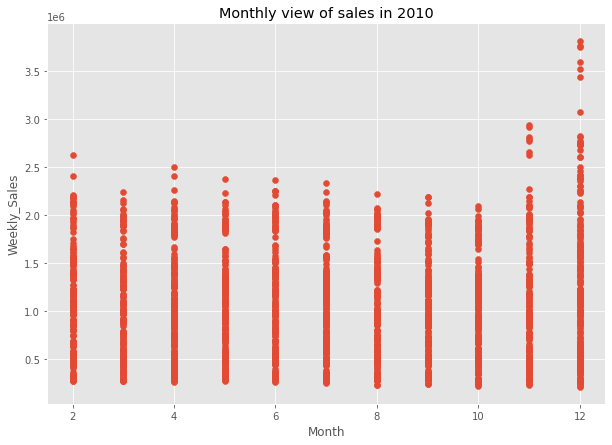

In [149]:
style.use("ggplot")
plt.figure(figsize=(10,7))
plt.scatter(sales_2010["Month"],sales_2010["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2010")

Text(0.5, 1.0, 'Monthly view of sales in 2011')

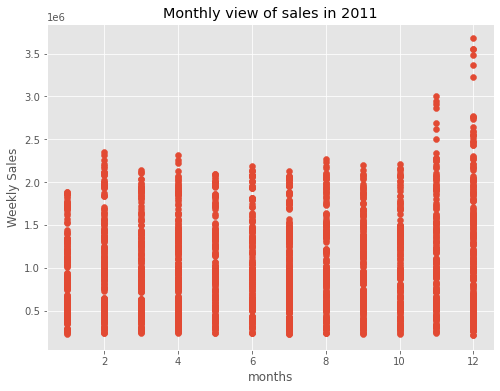

In [150]:
style.use("ggplot")
plt.figure(figsize=(8,6))
plt.scatter(sales_2011["Month"],sales_2011["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")

Text(0.5, 1.0, 'Monthly view of sales in 2012')

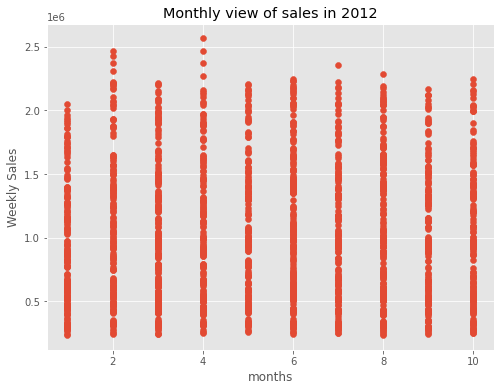

In [151]:
style.use("ggplot")
plt.figure(figsize=(8,6))
plt.scatter(sales_2012["Month"],sales_2012["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")

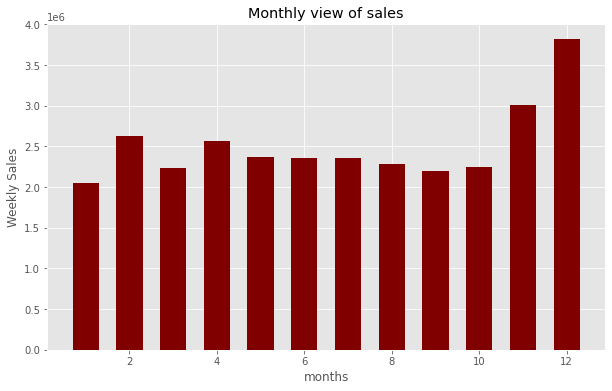

In [152]:
# Complete whole month view of sales
plt.figure(figsize=(10,6))
plt.bar(walmart_dataset["Month"],walmart_dataset["Weekly_Sales"],color ='maroon',width = 0.6)
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

In [153]:
# Semester view of Sales

In [154]:
semester_sales=[]
semester_sales.append(sales_2010.loc[sales_2010["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(sales_2010.loc[sales_2010["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(sales_2011.loc[sales_2011["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(sales_2011.loc[sales_2011["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(sales_2012.loc[sales_2012["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(sales_2012.loc[sales_2012["Month"]>6,["Weekly_Sales"]].sum())

In [155]:
semester_names=["sem1_2010","sem2_2010","sem1_2011","sem2_2011","sem1_2012","sem2_2012"]

Text(0.5, 1.0, 'Semester view of sales')

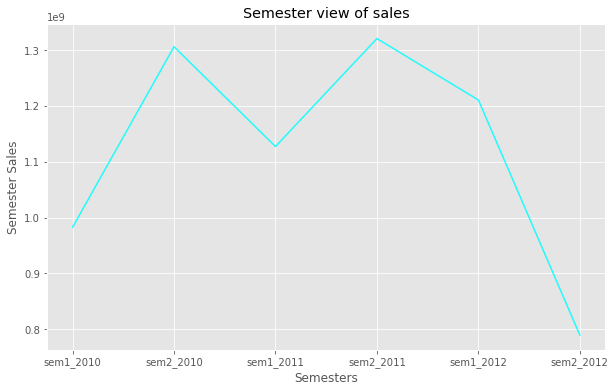

In [156]:
plt.figure(figsize=(10,6))
plt.plot(semester_names,semester_sales,alpha=0.85,color='cyan')
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

In [157]:
# Restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order)

In [158]:
x_object=walmart_dataset[walmart_dataset['Store'] == 1][['Store','Date']]
x_object

,Store,Date
0,1,2010-02-05
1,1,2010-02-12
2,1,2010-02-19
3,1,2010-02-26
4,1,2010-03-05
...,...,...
138,1,2012-09-28
139,1,2012-10-05
140,1,2012-10-12
141,1,2012-10-19


In [159]:
date_obj = walmart_dataset[walmart_dataset['Store'] == 1][['Date']]
print(date_obj)
date_obj.index+=1
date_obj


          Date
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
..         ...
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26

[143 rows x 1 columns]


,Date
1,2010-02-05
2,2010-02-12
3,2010-02-19
4,2010-02-26
5,2010-03-05
...,...
139,2012-09-28
140,2012-10-05
141,2012-10-12
142,2012-10-19


In [160]:
x_object.Date=date_obj.index
x_object

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
138,1,139
139,1,140
140,1,141
141,1,142


In [161]:
# Statistical Model

# For Store 1 – Build  prediction models to forecast demand

# Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [162]:
X_feature=walmart_dataset.drop(["Weekly_Sales","Holiday_Flag","Date","Year","Month","Unemployment"],axis=1)
X_feature=X_feature[X_feature["Store"]==1]
Y_target=walmart_dataset[walmart_dataset['Store']==1]["Weekly_Sales"]
print (X_feature)
print (Y_target)

     Store  Temperature  Fuel_Price         CPI
0        1        42.31       2.572  211.096358
1        1        38.51       2.548  211.242170
2        1        39.93       2.514  211.289143
3        1        46.63       2.561  211.319643
4        1        46.50       2.625  211.350143
..     ...          ...         ...         ...
138      1        76.08       3.666  222.981658
139      1        68.55       3.617  223.181477
140      1        62.99       3.601  223.381296
141      1        67.97       3.594  223.425723
142      1        69.16       3.506  223.444251

[143 rows x 4 columns]
0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64


In [163]:
# Splitting the data into training & testing datasets(75:25)
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_feature,Y_target,test_size=0.25,random_state=0 )

In [164]:
print (X_train.shape)
print (Y_train.shape)

(107, 4)
(107,)


In [165]:
print (X_test.shape)
print (Y_test.shape)

(36, 4)
(36,)


In [166]:
#import linear model
from sklearn.linear_model import LinearRegression
#creating instance of the class also called estimator
linreg = LinearRegression(normalize=True,n_jobs=-1)

In [167]:
#fit data into estimator
linreg.fit(X_train,Y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [168]:
print(linreg.intercept_)
print(linreg.coef_)

-21211.439679865725
[    0.         -2205.21336452 -7800.78291088  8052.94206211]


In [169]:
X_feature.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'CPI'], dtype='object')

<AxesSubplot:>

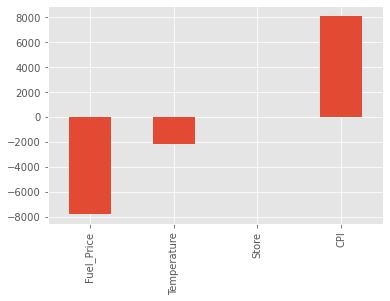

In [170]:
relation=pd.Series(linreg.coef_,X_feature.columns).sort_values()
relation.plot(kind="bar")

In [171]:
print ("From the above plot, CPI has the huge positive impact towards weekly sales of Store 1 .")
print ("On the other hand, we can conclude that Fuel_Price has a great negative impact on weekly sales of store 1.") 
 

From the above plot, CPI has the huge positive impact towards weekly sales of Store 1 .
On the other hand, we can conclude that Fuel_Price has a great negative impact on weekly sales of store 1.


In [172]:
print(format(linreg.score(X_test,Y_test)))

0.10418395241957368


In [173]:

print(sqrt(mean_squared_error(Y_train,linreg.predict(X_train))))

149008.6258762845


In [174]:
print(sqrt(mean_squared_error(Y_test,linreg.predict(X_test))))

141607.41112065336


In [175]:
print ("Here test error is less than train error. Hence our predicted model is well and good for Store 1. ")
print ("Since we are dealing with only Store 1  so we can't say about the whole walmart_data. Maybe this model predict more well or not when we work on whole data.")

Here test error is less than train error. Hence our predicted model is well and good for Store 1. 
Since we are dealing with only Store 1  so we can't say about the whole walmart_data. Maybe this model predict more well or not when we work on whole data.


In [176]:
#Change dates into days by creating new variable.
walmart_dataset['Day'] = pd.to_datetime(walmart_dataset['Date']).dt.day_name()
walmart_dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,Friday
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,Friday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday


In [ ]:
                                       Submitted By: Shubham Sharma
                  #################################Thank-You###############################